# ABOUT THE DATASET

#### This dataset was created with assistance from Opta Sports, using player statistics to predict whether a player is impactful when their team is behind by a goal. It captures a variety of performance metrics such as points (PTS), goals, interceptions, tackles, and more. The dataset is designed to analyze and predict player impact in live match scenarios based on these independent variables.

#### Target variable :- impactful(0,1)  Indicator of whether the player's performance was deemed impactful in the match (binary: 1 if yes, 0 if no).

## Criteria to fill impactful column:-

-Forwards (FW)

-More than 20 minutes: (Atleast one criteria should be passed)

- Goals (G) > 0
- Assists (A) > 0
- Points (PTS) > 10
- Shots on Target (SOnT) >= 2
- Crosses (C) >= 2 (considered as chances created)

-Less than 20 minutes:

- Goals (G) > 0
- Assists (A) > 0
- Points (PTS) > 5
- Shots on Target (SOnT) >= 1
- Crosses (C) >= 1 (considered as chances created)

-Midfielders (MID)

-More than 20 minutes: (Atleast two criteria should be passed)

- Assists (A) > 0
- Points (PTS) > 10
- Interceptions (INT) > 2
- Tackles (Tk) > 2
- Passes (P) > 20
- Crosses (C) >= 2 (considered as chances created)

-Less than 20 minutes:

- Assists (A) > 0
- Points (PTS) > 5
- Interceptions (INT) > 1
- Tackles (Tk) > 1
- Passes (P) > 10
- Crosses (C) >= 1 (considered as chances created)

# Independent Variables

- Player Name: The name of the player.

- Match Type: The type of match being played (e.g., league match, cup match).

- Pos.: The position of the player on the field (e.g., forward, midfielder ).

- PTS.: player's overall performance based on multiple individual metrics like goals, assists, and tackles.

- MP: Minutes played by the player in the match.

- G: Goals scored by the player.

- SOnT: Shots on target by the player.

- SOffT: Shots off target by the player.

- BS: Blocked shots by the player.

- OG: Own goals scored by the player.

- A: Assists made by the player.

- P: Passes completed by the player.

- C: Chance Created by the player.

- Tk: Tackles made by the player.

- INT: Interceptions made by the player.

- FW: Fouls won by the player.

- FC: Fouls committed by the player.

- O: Offsides by the player.

- YC: Yellow cards received by the player.

- RC: Red cards received by the player.

- GC: Goals conceded by the player.

- is_behind: Indicator of whether the player’s team was behind at any point during the match (binary: 1 if yes, 0 if no).

- Location: The location of the match (e.g., home, away).

- Match Level: The level or importance of the match (e.g.,Hard,Medium,Easy).


# Libraries

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_excel('PL_DATA_new.xlsx')

In [74]:
pd.options.display.max_columns=None

df.head()

,Player Name,Match Type,Pos.,PTS.,MP,G,SOnT,SOffT,BS,OG,A,P,C,Tk,INT,FW,FC,O,YC,RC,GC,is_behind,Location,Match Level,Impactful
0,E. Ferguson,League,FW,15.2,12,1,1,1,0,0,0,6.0,0,0,0,0,-1,0,0,0,-1,0,Home,Easy,1
1,S. Adingra,League,FW,14.2,16,1,1,0,0,0,0,6.0,0,0,0,0,0,0,0,0,-1,0,Home,Easy,1
2,B. Gilmour,League,MID,6.4,16,0,1,0,0,0,0,16.0,1,0,0,0,0,0,0,0,-1,0,Home,Easy,1
3,Mahmoud Dahoud,League,MID,6.4,9,0,0,0,0,0,0,22.0,0,1,0,0,0,0,0,0,0,0,Away,Easy,1
4,Joao Pedro,League,FW,6.0,33,0,0,0,1,0,0,10.0,0,2,0,1,0,-1,-2,0,-1,0,Away,Easy,0


In [75]:
df.columns

Index(['Player Name', 'Match Type', 'Pos.', 'PTS.', 'MP', 'G', 'SOnT', 'SOffT',
       'BS', 'OG', 'A', 'P', 'C', 'Tk', 'INT', 'FW', 'FC', 'O', 'YC', 'RC',
       'GC', 'is_behind', 'Location', 'Match Level', 'Impactful'],
      dtype='object')

In [76]:
# five point summary of integer datatype of column

df.describe()

,PTS.,MP,G,SOnT,SOffT,BS,OG,A,P,C,Tk,INT,FW,FC,O,YC,RC,GC,is_behind,Impactful
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.000000,146.000000,146.000000
mean,6.857534,25.342466,0.095890,0.301370,0.239726,0.328767,0.0,0.020548,13.723288,0.383562,0.582192,0.157534,0.431507,-0.136986,-0.006849,-0.116438,0.0,-0.226027,0.356164,0.431507
std,6.728712,14.725740,0.338939,0.579772,0.488556,0.600110,0.0,0.142354,9.464191,0.991413,0.794436,0.401520,0.741922,0.860073,0.321560,0.604697,0.0,0.828547,0.480513,0.496991
min,-2.600000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-1.000000,-2.000000,0.0,-3.000000,0.000000,0.000000
25%,2.850000,14.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.000000,0.000000,0.000000
50%,4.900000,23.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,8.800000,31.750000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,18.750000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,44.200000,82.000000,2.000000,3.000000,2.000000,3.000000,0.0,1.000000,49.000000,5.000000,4.000000,2.000000,3.000000,2.000000,2.000000,1.000000,0.0,2.000000,1.000000,1.000000


- As we seen standard deviation for columns like OG,RC is zero so, this columns not give any information so we drop this column

In [77]:
## dropping the column

df.drop(['OG','RC'],inplace=True,axis=1)

In [78]:
# Renaming columns at the DataFrame level
df.rename(columns={'PTS.': 'PTS', 'Pos.': 'Pos','Match Level':'Match_Level'}, inplace=True)


In [79]:
df.head()

,Player Name,Match Type,Pos,PTS,MP,G,SOnT,SOffT,BS,A,P,C,Tk,INT,FW,FC,O,YC,GC,is_behind,Location,Match_Level,Impactful
0,E. Ferguson,League,FW,15.2,12,1,1,1,0,0,6.0,0,0,0,0,-1,0,0,-1,0,Home,Easy,1
1,S. Adingra,League,FW,14.2,16,1,1,0,0,0,6.0,0,0,0,0,0,0,0,-1,0,Home,Easy,1
2,B. Gilmour,League,MID,6.4,16,0,1,0,0,0,16.0,1,0,0,0,0,0,0,-1,0,Home,Easy,1
3,Mahmoud Dahoud,League,MID,6.4,9,0,0,0,0,0,22.0,0,1,0,0,0,0,0,0,0,Away,Easy,1
4,Joao Pedro,League,FW,6.0,33,0,0,0,1,0,10.0,0,2,0,1,0,-1,-2,-1,0,Away,Easy,0


In [80]:
df.shape

(146, 23)

In [81]:
df.dtypes

Player Name     object
Match Type      object
Pos             object
PTS            float64
MP               int64
G                int64
SOnT             int64
SOffT            int64
BS               int64
A                int64
P              float64
C                int64
Tk               int64
INT              int64
FW               int64
FC               int64
O                int64
YC               int64
GC               int64
is_behind        int64
Location        object
Match_Level     object
Impactful        int64
dtype: object

<Axes: >

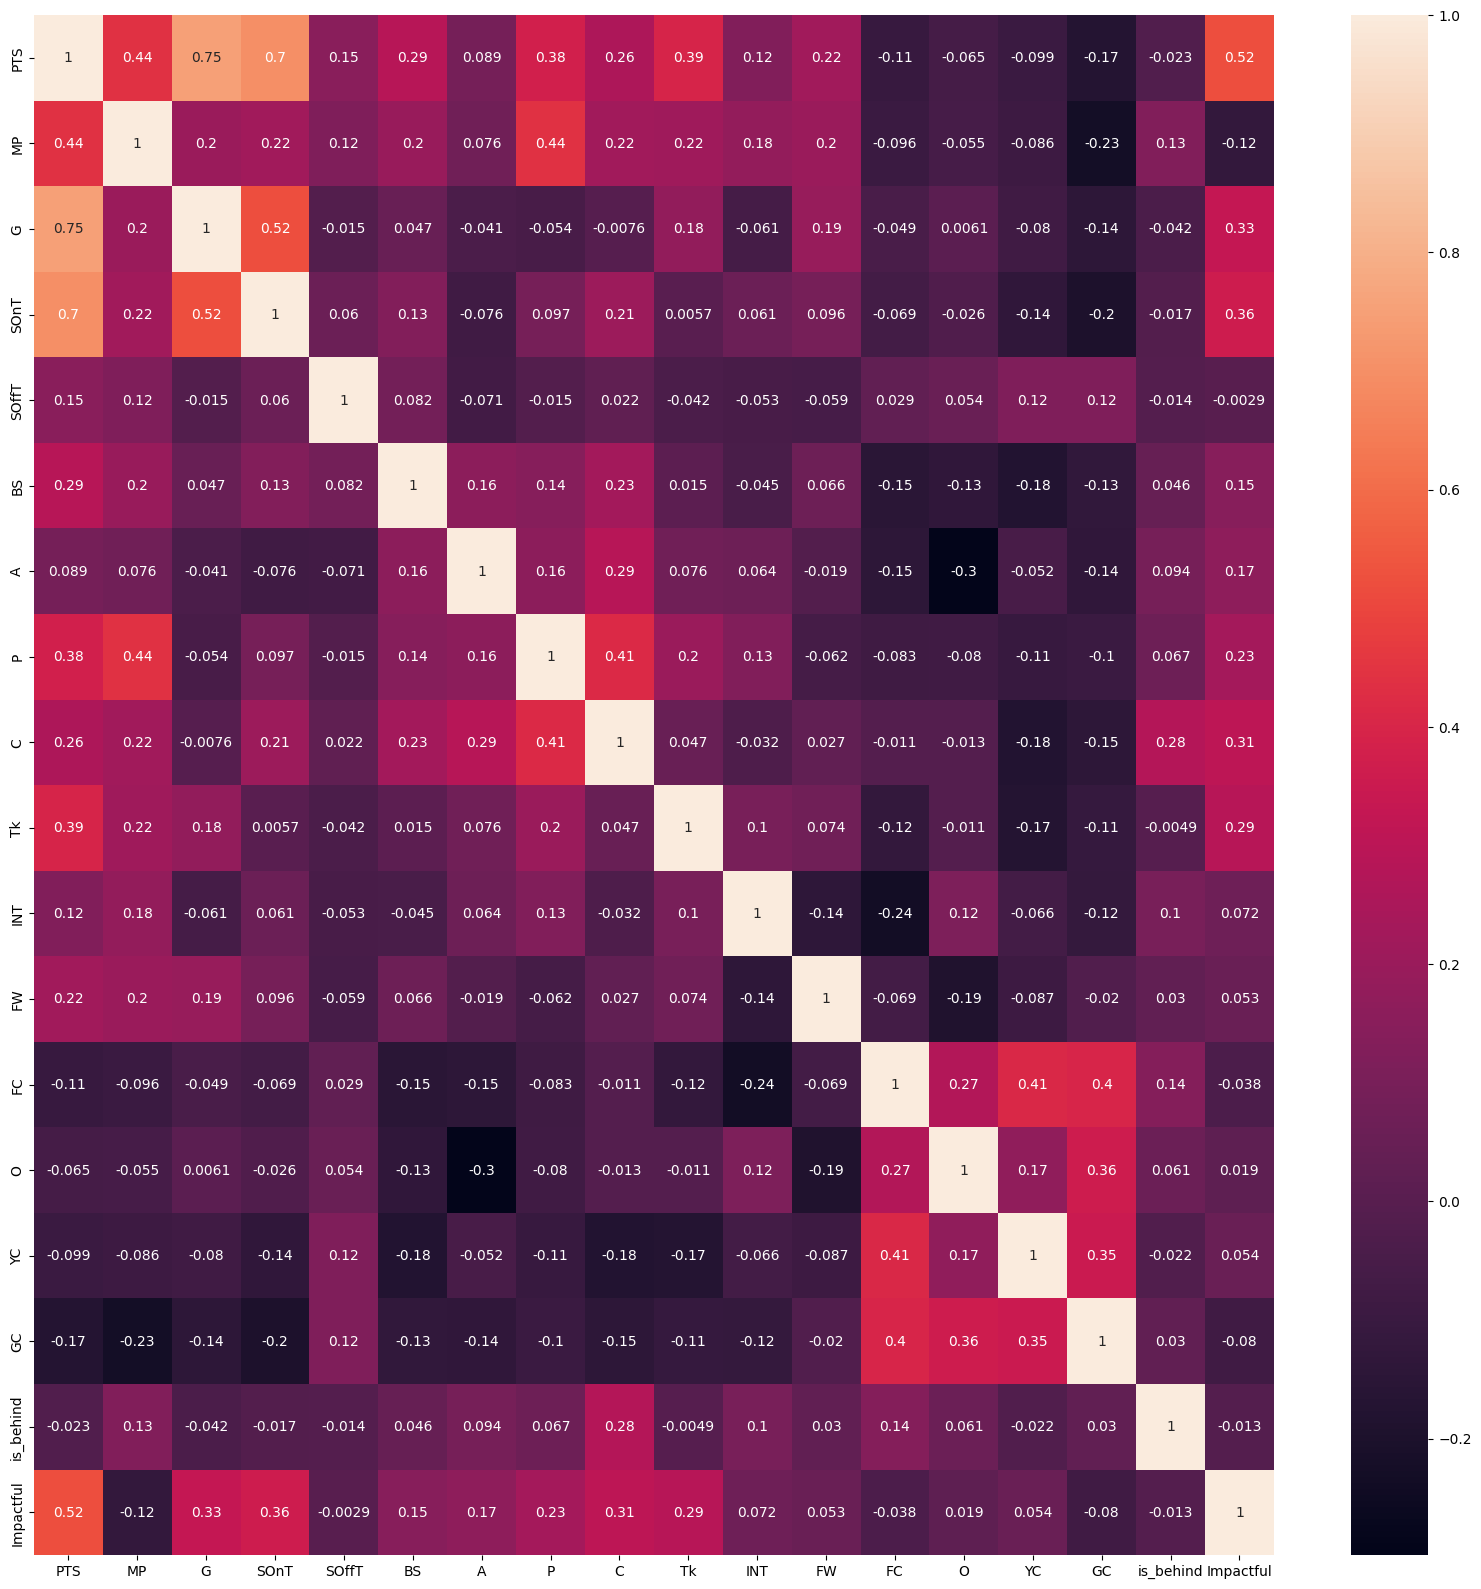

In [82]:
plt.figure(figsize=(20,20))

sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)

In [83]:
## five point summary of object datatype columns.

df.select_dtypes(include='object').describe()

,Player Name,Match Type,Pos,Location,Match_Level
count,146,146,146,146,146
unique,18,3,2,2,3
top,E. Ferguson,League,MID,Away,Medium
freq,16,112,76,90,51


In [84]:
# check for duplicates in the dataset.

df[df.duplicated()]  # no duplicate data in this dataset.

,Player Name,Match Type,Pos,PTS,MP,G,SOnT,SOffT,BS,A,P,C,Tk,INT,FW,FC,O,YC,GC,is_behind,Location,Match_Level,Impactful


In [85]:
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts())
    print('-------------------------------------')

Player Name
E. Ferguson         16
Ansu Fati           15
Joao Pedro          13
C. Baleba           13
A. Lallana          12
D. Welbeck          12
F. Buonanotte       12
B. Gilmour           8
J. Moder             8
S. Adingra           7
J. Enciso            7
J. Milner            6
Mahmoud Dahoud       4
K. Mitoma            4
J. Hinshelwood       4
P. Gross             2
B. Baker-Boaitey     2
M. OMahony           1
Name: count, dtype: int64
-------------------------------------
Match Type
League           112
Europa League     25
FA CUP             9
Name: count, dtype: int64
-------------------------------------
Pos
MID    76
FW     70
Name: count, dtype: int64
-------------------------------------
Location
Away    90
Home    56
Name: count, dtype: int64
-------------------------------------
Match_Level
Medium    51
Hard      50
Easy      45
Name: count, dtype: int64
-------------------------------------


In [86]:
for i in df.select_dtypes(exclude='object'):
    print(df[i].value_counts())
    print('-------------------------------------')

PTS
4.6     7
8.2     5
5.8     4
4.8     4
2.8     4
       ..
10.2    1
19.2    1
15.0    1
19.6    1
2.2     1
Name: count, Length: 75, dtype: int64
-------------------------------------
MP
45    20
13    11
9      8
33     6
23     6
26     6
16     6
21     6
30     5
29     5
15     5
20     5
24     4
19     4
14     4
31     4
18     4
25     3
27     3
4      3
11     3
12     3
37     2
32     2
28     2
17     2
5      2
7      2
56     1
69     1
63     1
70     1
22     1
74     1
10     1
34     1
82     1
8      1
Name: count, dtype: int64
-------------------------------------
G
0    134
1     10
2      2
Name: count, dtype: int64
-------------------------------------
SOnT
0    110
1     29
2      6
3      1
Name: count, dtype: int64
-------------------------------------
SOffT
0    115
1     27
2      4
Name: count, dtype: int64
-------------------------------------
BS
0    107
1     31
2      7
3      1
Name: count, dtype: int64
-------------------------------------
A
0

In [87]:
df.head()

,Player Name,Match Type,Pos,PTS,MP,G,SOnT,SOffT,BS,A,P,C,Tk,INT,FW,FC,O,YC,GC,is_behind,Location,Match_Level,Impactful
0,E. Ferguson,League,FW,15.2,12,1,1,1,0,0,6.0,0,0,0,0,-1,0,0,-1,0,Home,Easy,1
1,S. Adingra,League,FW,14.2,16,1,1,0,0,0,6.0,0,0,0,0,0,0,0,-1,0,Home,Easy,1
2,B. Gilmour,League,MID,6.4,16,0,1,0,0,0,16.0,1,0,0,0,0,0,0,-1,0,Home,Easy,1
3,Mahmoud Dahoud,League,MID,6.4,9,0,0,0,0,0,22.0,0,1,0,0,0,0,0,0,0,Away,Easy,1
4,Joao Pedro,League,FW,6.0,33,0,0,0,1,0,10.0,0,2,0,1,0,-1,-2,-1,0,Away,Easy,0


# Visualization

<Axes: xlabel='PTS', ylabel='MP'>

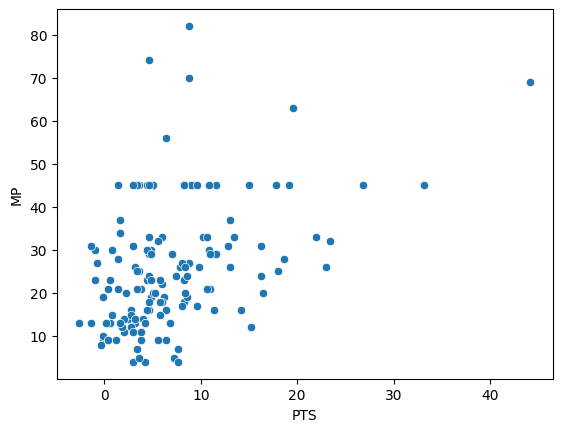

In [88]:
sns.scatterplot(df,x='PTS',y='MP')

<Axes: xlabel='G', ylabel='MP'>

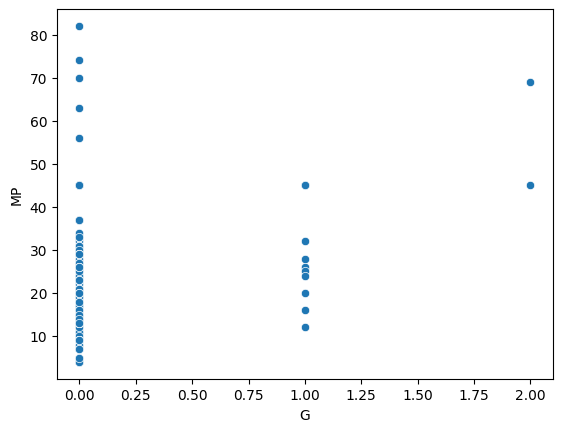

In [89]:
sns.scatterplot(df,x='G',y='MP')

<Axes: xlabel='P', ylabel='MP'>

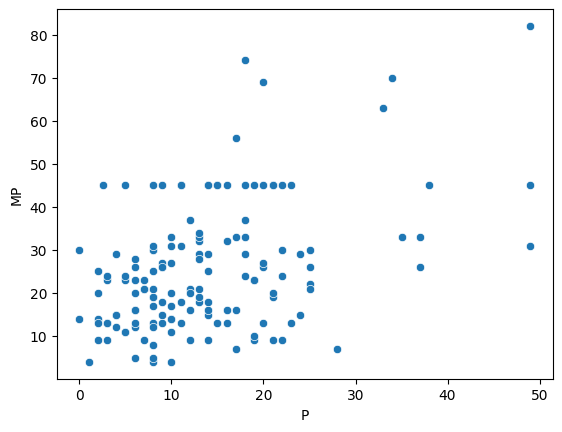

In [90]:
sns.scatterplot(df,x='P',y='MP')

<Axes: xlabel='Location,Impactful'>

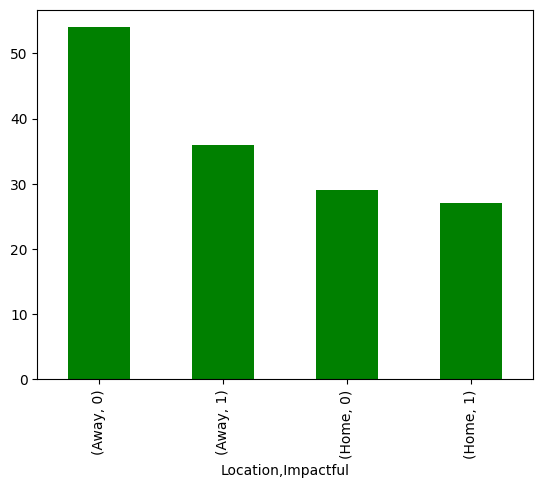

In [91]:
df.groupby('Location')['Impactful'].value_counts().plot(kind='bar',color='g')

<Axes: xlabel='Match_Level,Impactful'>

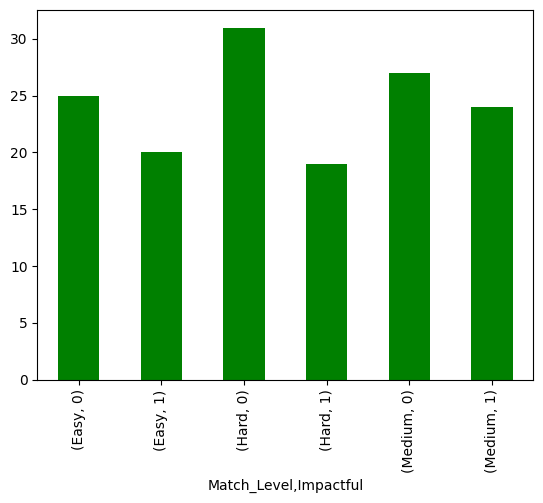

In [92]:
df.groupby('Match_Level')['Impactful'].value_counts().plot(kind='bar',color='g')

<Axes: xlabel='is_behind,Impactful'>

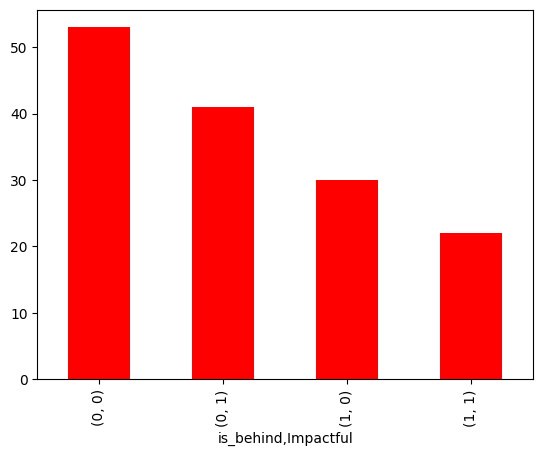

In [93]:
df.groupby('is_behind')['Impactful'].value_counts().plot(kind='bar',color='r')

# EDA

In [94]:
df.isnull().sum()

Player Name    0
Match Type     0
Pos            0
PTS            0
MP             0
G              0
SOnT           0
SOffT          0
BS             0
A              0
P              0
C              0
Tk             0
INT            0
FW             0
FC             0
O              0
YC             0
GC             0
is_behind      0
Location       0
Match_Level    0
Impactful      0
dtype: int64

In [95]:
df['GC'].unique()

df['GC'].replace({-1:1,-2:2,-3:3},inplace=True)

df['GC'].unique()

array([1, 0, 3, 2], dtype=int64)

In [96]:
df['YC'].unique()

df['YC'] = df['YC'].replace(-2,2)

df['YC'].unique()

array([0, 2, 1], dtype=int64)

In [97]:
df['O'].unique()

df['O'] = df['O'].replace(-1,1)

df['O'].unique()

array([0, 1, 2], dtype=int64)

In [98]:
df['FC'].unique()

df['FC'].replace({-1:1,-2:2,-3:3},inplace=True)

df['FC'].unique()

array([1, 0, 2, 3], dtype=int64)

In [99]:
df['Impactful'].value_counts()/df.shape[0]*100

Impactful
0    56.849315
1    43.150685
Name: count, dtype: float64

# Outliers

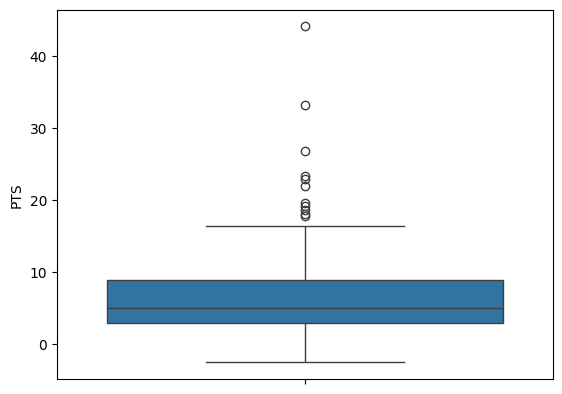

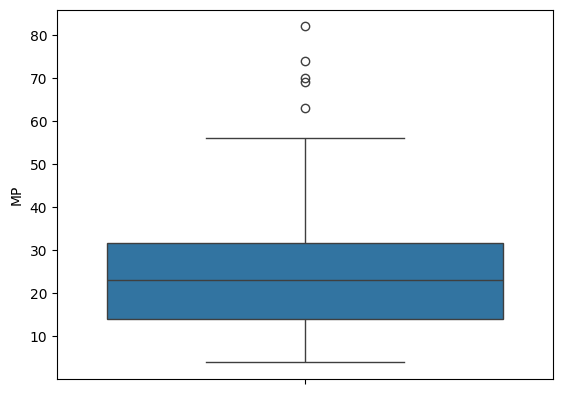

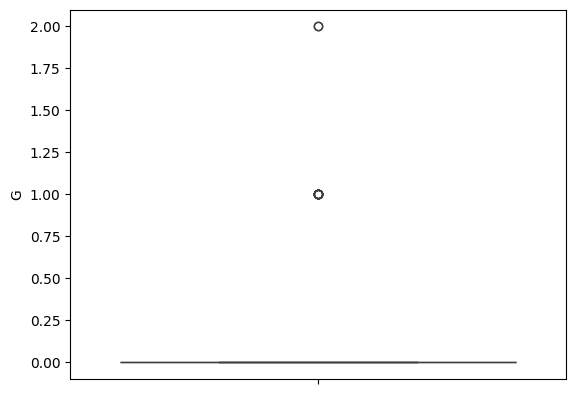

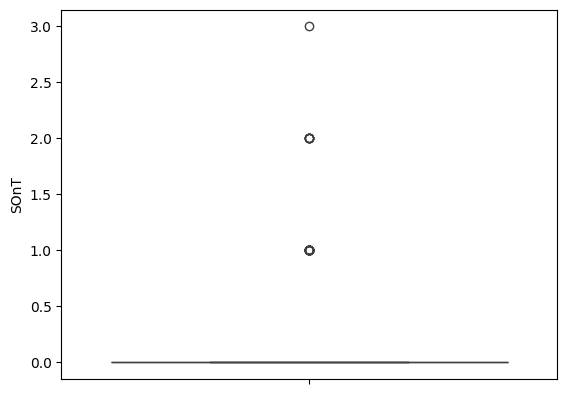

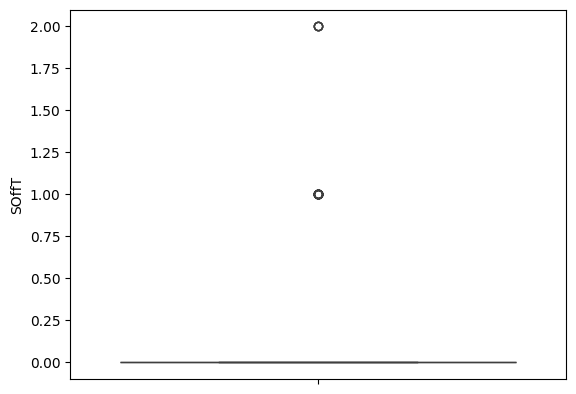

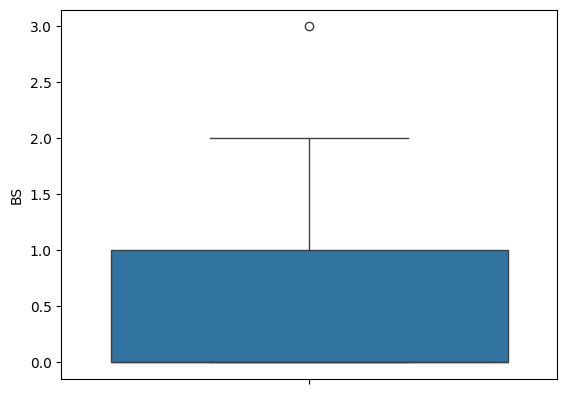

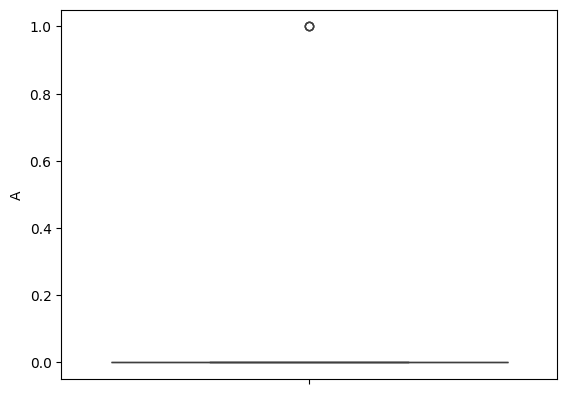

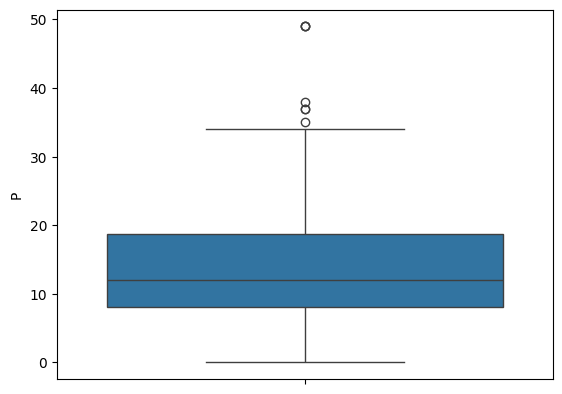

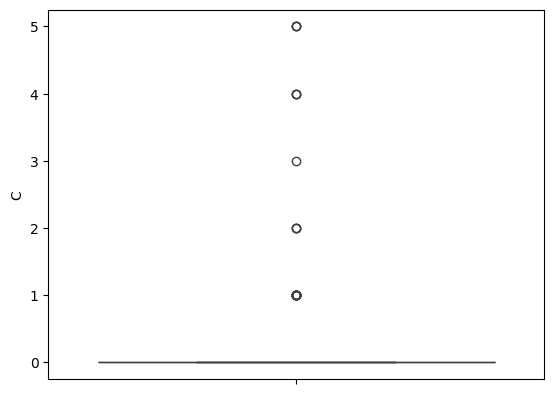

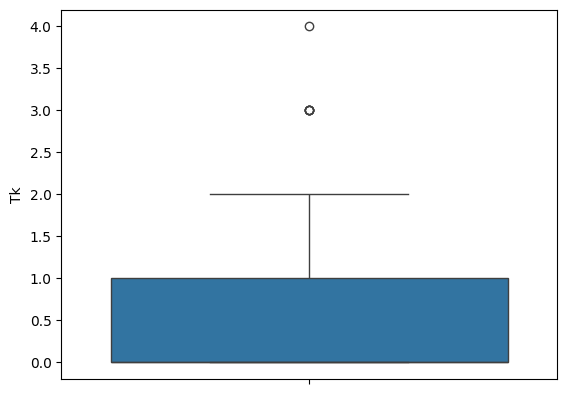

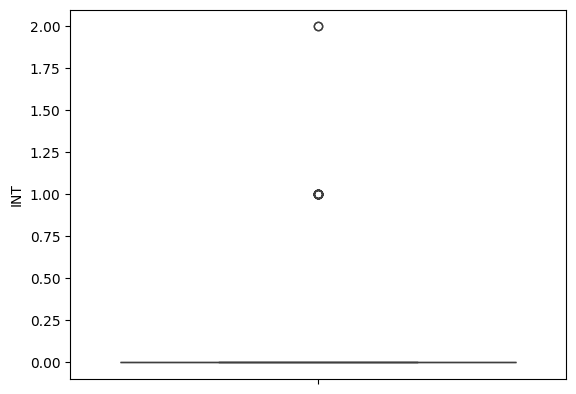

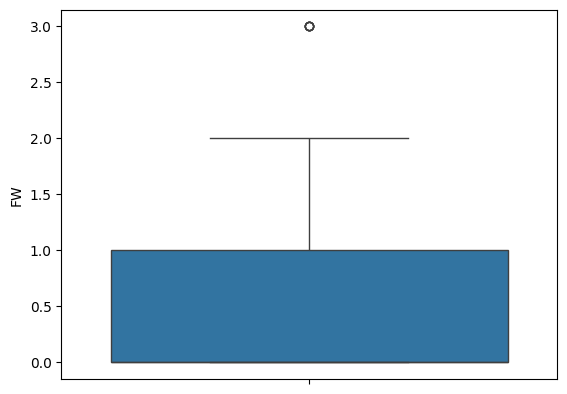

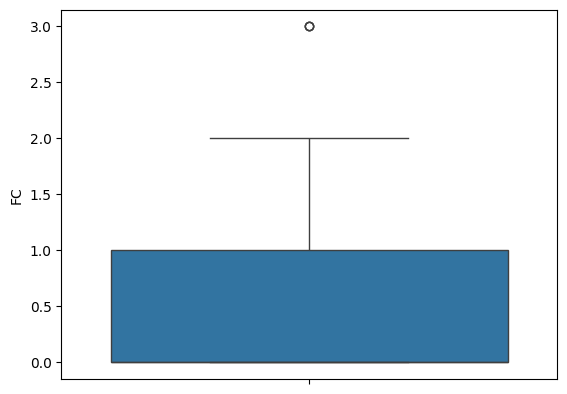

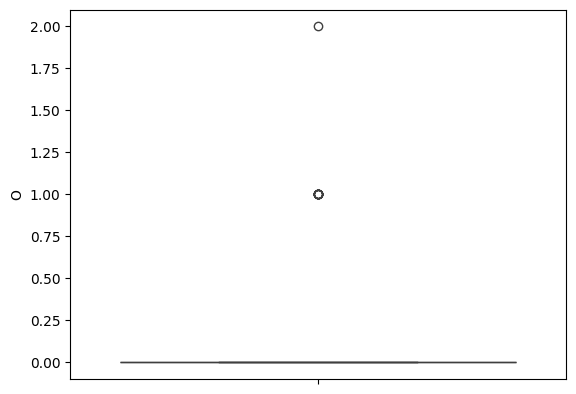

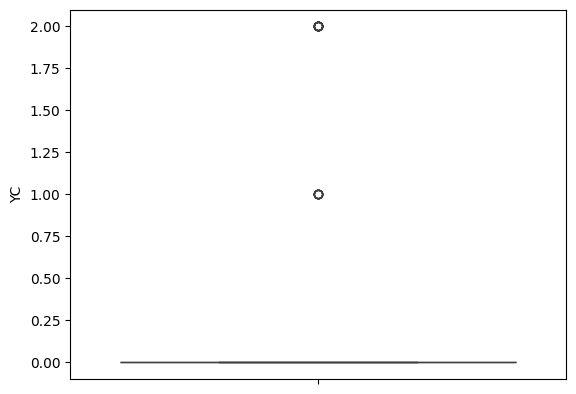

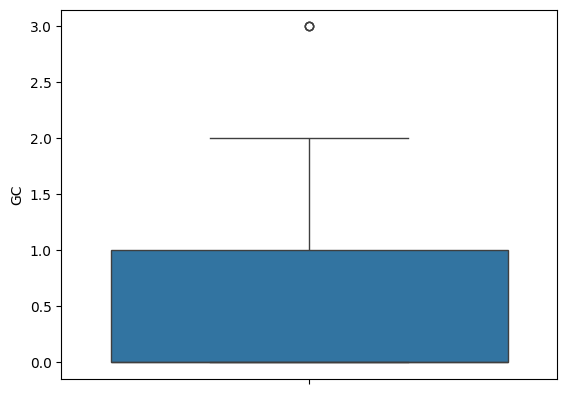

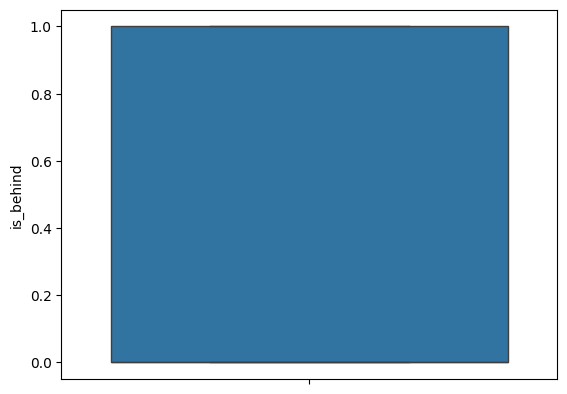

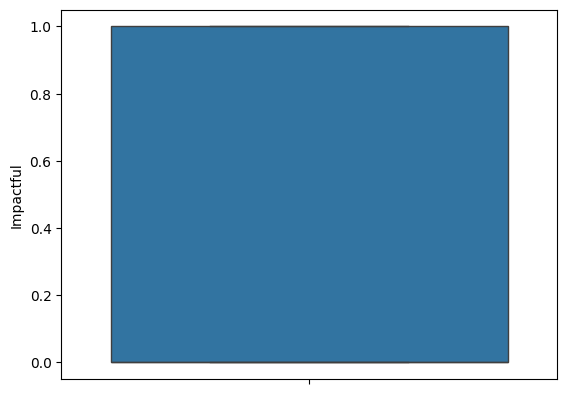

In [100]:
for i in df.select_dtypes(exclude='object'):
    sns.boxplot(df[i])
    plt.show()

we have seen outliers in the dataset.

we dont drop or map them because it leads to loose data and outliers is important in this dataset

In [101]:
df1 = df

In [102]:
df1.head()

,Player Name,Match Type,Pos,PTS,MP,G,SOnT,SOffT,BS,A,P,C,Tk,INT,FW,FC,O,YC,GC,is_behind,Location,Match_Level,Impactful
0,E. Ferguson,League,FW,15.2,12,1,1,1,0,0,6.0,0,0,0,0,1,0,0,1,0,Home,Easy,1
1,S. Adingra,League,FW,14.2,16,1,1,0,0,0,6.0,0,0,0,0,0,0,0,1,0,Home,Easy,1
2,B. Gilmour,League,MID,6.4,16,0,1,0,0,0,16.0,1,0,0,0,0,0,0,1,0,Home,Easy,1
3,Mahmoud Dahoud,League,MID,6.4,9,0,0,0,0,0,22.0,0,1,0,0,0,0,0,0,0,Away,Easy,1
4,Joao Pedro,League,FW,6.0,33,0,0,0,1,0,10.0,0,2,0,1,0,1,2,1,0,Away,Easy,0


# Transformation

In [103]:
df.head()

,Player Name,Match Type,Pos,PTS,MP,G,SOnT,SOffT,BS,A,P,C,Tk,INT,FW,FC,O,YC,GC,is_behind,Location,Match_Level,Impactful
0,E. Ferguson,League,FW,15.2,12,1,1,1,0,0,6.0,0,0,0,0,1,0,0,1,0,Home,Easy,1
1,S. Adingra,League,FW,14.2,16,1,1,0,0,0,6.0,0,0,0,0,0,0,0,1,0,Home,Easy,1
2,B. Gilmour,League,MID,6.4,16,0,1,0,0,0,16.0,1,0,0,0,0,0,0,1,0,Home,Easy,1
3,Mahmoud Dahoud,League,MID,6.4,9,0,0,0,0,0,22.0,0,1,0,0,0,0,0,0,0,Away,Easy,1
4,Joao Pedro,League,FW,6.0,33,0,0,0,1,0,10.0,0,2,0,1,0,1,2,1,0,Away,Easy,0


In [104]:
# df = pd.get_dummies(df,columns=['Player Name'],dtype='int')

In [105]:
df.drop('Player Name',axis=1,inplace=True)

In [106]:
df

,Match Type,Pos,PTS,MP,G,SOnT,SOffT,BS,A,P,C,Tk,INT,FW,FC,O,YC,GC,is_behind,Location,Match_Level,Impactful
0,League,FW,15.2,12,1,1,1,0,0,6.0,0,0,0,0,1,0,0,1,0,Home,Easy,1
1,League,FW,14.2,16,1,1,0,0,0,6.0,0,0,0,0,0,0,0,1,0,Home,Easy,1
2,League,MID,6.4,16,0,1,0,0,0,16.0,1,0,0,0,0,0,0,1,0,Home,Easy,1
3,League,MID,6.4,9,0,0,0,0,0,22.0,0,1,0,0,0,0,0,0,0,Away,Easy,1
4,League,FW,6.0,33,0,0,0,1,0,10.0,0,2,0,1,0,1,2,1,0,Away,Easy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,FA CUP,MID,5.8,18,0,0,0,0,0,14.0,0,1,0,1,0,0,0,0,0,Away,Easy,1
142,FA CUP,FW,9.6,45,0,1,1,0,0,18.0,0,0,0,0,0,0,0,0,1,Away,Easy,0
143,FA CUP,MID,8.4,20,0,0,1,1,0,12.0,0,0,0,3,1,0,0,0,1,Away,Easy,1
144,FA CUP,MID,7.0,29,0,0,0,1,0,24.0,1,0,0,0,0,0,0,0,1,Away,Easy,0


In [107]:
df.columns

Index(['Match Type', 'Pos', 'PTS', 'MP', 'G', 'SOnT', 'SOffT', 'BS', 'A', 'P',
       'C', 'Tk', 'INT', 'FW', 'FC', 'O', 'YC', 'GC', 'is_behind', 'Location',
       'Match_Level', 'Impactful'],
      dtype='object')

In [108]:
df['Match Type'].unique()

array(['League', 'Europa League', 'FA CUP'], dtype=object)

In [109]:
df['Match Type'] = df['Match Type'].replace({'League':2,'FA CUP':0,'Europa League':1})

In [110]:
df['Location'] = df['Location'].replace({'Home':0,'Away':1})

In [111]:
df['Match_Level'] = df['Match_Level'].replace({'Easy':0,'Hard':1,'Medium':2})

In [112]:
df['Pos'] = df['Pos'].replace({'FW':0,'MID':1})

In [113]:
df.head()

,Match Type,Pos,PTS,MP,G,SOnT,SOffT,BS,A,P,C,Tk,INT,FW,FC,O,YC,GC,is_behind,Location,Match_Level,Impactful
0,2,0,15.2,12,1,1,1,0,0,6.0,0,0,0,0,1,0,0,1,0,0,0,1
1,2,0,14.2,16,1,1,0,0,0,6.0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,1,6.4,16,0,1,0,0,0,16.0,1,0,0,0,0,0,0,1,0,0,0,1
3,2,1,6.4,9,0,0,0,0,0,22.0,0,1,0,0,0,0,0,0,0,1,0,1
4,2,0,6.0,33,0,0,0,1,0,10.0,0,2,0,1,0,1,2,1,0,1,0,0


In [114]:
df.drop('Match Type',axis=1,inplace=True)

In [115]:
from sklearn.model_selection import train_test_split

x= df.drop('Impactful',axis=1)
y= df['Impactful']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=100)

In [116]:
xtrain.shape

(116, 20)

In [117]:
xtest.shape

(30, 20)

In [118]:
ytrain.shape

(116,)

In [119]:
ytest.shape

(30,)

In [120]:
df.dtypes

Pos              int64
PTS            float64
MP               int64
G                int64
SOnT             int64
SOffT            int64
BS               int64
A                int64
P              float64
C                int64
Tk               int64
INT              int64
FW               int64
FC               int64
O                int64
YC               int64
GC               int64
is_behind        int64
Location         int64
Match_Level      int64
Impactful        int64
dtype: object

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Logistic Regression model
LR = LogisticRegression()
LR_model = LR.fit(xtrain, ytrain)

# Make predictions on the training and test sets
train_pred = LR_model.predict(xtrain)
test_pred = LR_model.predict(xtest)

# Print classification reports for the training and test sets
print(classification_report(ytrain, train_pred))
print(classification_report(ytest, test_pred))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93        65
           1       0.90      0.92      0.91        51

    accuracy                           0.92       116
   macro avg       0.92      0.92      0.92       116
weighted avg       0.92      0.92      0.92       116

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
df.head()

,Pos,PTS,MP,G,SOnT,SOffT,BS,A,P,C,Tk,INT,FW,FC,O,YC,GC,is_behind,Location,Match_Level,Impactful
0,0,15.2,12,1,1,1,0,0,6.0,0,0,0,0,1,0,0,1,0,0,0,1
1,0,14.2,16,1,1,0,0,0,6.0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,6.4,16,0,1,0,0,0,16.0,1,0,0,0,0,0,0,1,0,0,0,1
3,1,6.4,9,0,0,0,0,0,22.0,0,1,0,0,0,0,0,0,0,1,0,1
4,0,6.0,33,0,0,0,1,0,10.0,0,2,0,1,0,1,2,1,0,1,0,0


In [123]:
# Initialize and fit the Logistic Regression model
RN = RandomForestClassifier()
RN_model = RN.fit(xtrain, ytrain)

# Make predictions on the training and test sets
train_pred = RN_model.predict(xtrain)
test_pred = RN_model.predict(xtest)

# Print classification reports for the training and test sets
print(classification_report(ytrain, train_pred))
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        51

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



In [124]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the Logistic Regression model
DT = DecisionTreeClassifier()
DT_model = DT.fit(xtrain, ytrain)

# Make predictions on the training and test sets
train_pred = DT_model.predict(xtrain)
test_pred = DT_model.predict(xtest)

# Print classification reports for the training and test sets
print(classification_report(ytrain, train_pred))
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        51

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.77      0.83      0.80        12

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



In [125]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the Logistic Regression model
KN = KNeighborsClassifier()
KN_model = KN.fit(xtrain, ytrain)

# Make predictions on the training and test sets
train_pred = KN_model.predict(xtrain)
test_pred = KN_model.predict(xtest)

# Print classification reports for the training and test sets
print(classification_report(ytrain, train_pred))
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        65
           1       0.84      0.80      0.82        51

    accuracy                           0.84       116
   macro avg       0.84      0.84      0.84       116
weighted avg       0.84      0.84      0.84       116

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.73      0.67      0.70        12

    accuracy                           0.77        30
   macro avg       0.76      0.75      0.75        30
weighted avg       0.76      0.77      0.76        30



In [126]:
import xgboost as xgb

In [127]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_model = xgb.fit(xtrain,ytrain)
train_pred = xgb_model.predict(xtrain)
test_pred = xgb_model.predict(xtest)

print(classification_report(ytrain,train_pred))
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        51

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Hyperparameter Tuning

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,f1_score
param_grid = {'n_estimators':[50,150,120,170,200,70,220,65],
    'min_samples_split':[3,4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

GSCV = GridSearchCV(estimator=RN,param_grid=param_grid,scoring=f1_score,cv=5,n_jobs=-1)
GSCV.fit(xtrain,ytrain)

print('best_scores:',GSCV.best_params_)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan n

best_scores: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


In [129]:
# Initialize and fit the Logistic Regression model
RN_tuned = RandomForestClassifier(min_samples_leaf= 2, min_samples_split= 3, n_estimators= 50)
RN_model = RN_tuned.fit(xtrain, ytrain)

# Make predictions on the training and test sets
train_pred = RN_model.predict(xtrain)
test_pred = RN_model.predict(xtest)

# Print classification reports for the training and test sets
print(classification_report(ytrain, train_pred))
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        65
           1       0.98      0.96      0.97        51

    accuracy                           0.97       116
   macro avg       0.97      0.97      0.97       116
weighted avg       0.97      0.97      0.97       116

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.89      0.67      0.76        12

    accuracy                           0.83        30
   macro avg       0.85      0.81      0.82        30
weighted avg       0.84      0.83      0.83        30



In [130]:
importances = RN.feature_importances_

feature_importances = pd.DataFrame({'Feature': xtrain.columns, 'Importance': importances})

feature_importances.sort_values(by='Importance'
                                ,ascending=False)

,Feature,Importance
1,PTS,0.250877
2,MP,0.170734
8,P,0.121937
9,C,0.056706
4,SOnT,0.046932
10,Tk,0.045099
3,G,0.040367
13,FC,0.035746
0,Pos,0.031726
19,Match_Level,0.030608


In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,f1_score
param_grid = {'max_depth': [3, 4, 5, 6,7,8, 9,10,11,12,13,14,15],
    'gamma': [0, 0.1, 0.2,0.3,0.4,0.5, 1, 2,3,4],
    }

GSCV = GridSearchCV(estimator=xgb,param_grid=param_grid,scoring=f1_score,cv=5,n_jobs=-1)
GSCV.fit(xtrain,ytrain)

print('best_scores:',GSCV.best_params_)

best_scores: {'gamma': 0, 'max_depth': 3}


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


In [144]:
xgb_tuned = XGBClassifier(gamma=0,max_depth=3)
xgb_model = xgb_tuned.fit(xtrain,ytrain)
train_pred = xgb_model.predict(xtrain)
test_pred = xgb_model.predict(xtest)

print(classification_report(ytrain,train_pred))
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        51

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [145]:
importances = xgb_tuned.feature_importances_

feature_importances = pd.DataFrame({'Feature': xtrain.columns, 'Importance': importances})

feature_importances.sort_values(by='Importance'
                                ,ascending=False)

,Feature,Importance
1,PTS,0.221053
9,C,0.170716
2,MP,0.160860
11,INT,0.137894
8,P,0.054523
14,O,0.050763
10,Tk,0.034906
6,BS,0.033347
16,GC,0.027128
19,Match_Level,0.026673


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\gradio\helpers.py:940: UserWarning: Unexpected argument. Filling with None.
  warnings.warn("Unexpected argument. Filling with None.")


# Model Deployement

In [133]:
model = RN

In [134]:
# evaluating the model performance on the test data
from sklearn.metrics import f1_score
import numpy as np
final_model_test_predictions = model.predict(xtest)
final_model_test_score = f1_score(ytest, final_model_test_predictions)

print("Model Score on Test Data:", np.round(100*final_model_test_score, 2))

Model Score on Test Data: 90.91


In [135]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Assume `model` is your trained RandomForest model
joblib.dump(model, 'path_to_your_randomforest_model.pkl')


['path_to_your_randomforest_model.pkl']

In [136]:
import joblib

# Load the RandomForest model
substitution_predictor = joblib.load('path_to_your_randomforest_model.pkl')


In [137]:
import gradio as gr

# Define the input interface for the football substitution model
model_inputs = [
    gr.Dropdown(label="Position", choices=["FW", "MID"], type="value"),
    gr.Number(label="Points", step=0.1),
    gr.Number(label="Minutes Played", step=0.1),
    gr.Number(label="Goals", step=1),
    gr.Number(label="Shots On Target", step=1),
    gr.Number(label="Shots Off Target", step=1),
    gr.Number(label="Ball Saves", step=1),
    gr.Number(label="Assists", step=1),
    gr.Number(label="Passes", step=1),
    gr.Number(label="Crosses", step=1),
    gr.Number(label="Tackles", step=1),
    gr.Number(label="Interceptions", step=1),
    gr.Number(label="Fouls Committed", step=1),
    gr.Number(label="Offsides", step=1),
    gr.Number(label="Yellow Cards", step=1),
    gr.Number(label="Goals Conceded", step=1),
    gr.Checkbox(label="Is the Team Behind"),
    gr.Dropdown(label="Location", choices=["Home", "Away"]),
    gr.Dropdown(label="Match Level", choices=["Easy", "Medium", "Hard"])
]

# Define the output interface for the football substitution model
model_outputs = [
    gr.Textbox(label="Will the substitution be impactful?", type="text"),
    gr.Textbox(label="Probability of Impact", type="text")
]


In [138]:
# Function to map dropdown values to feature values
def map_position(pos):
    return 0 if pos == "FW" else 1

def predict_impactful_substitution(Position, PTS, MP, G, SOnT, SOffT, BS, A, P, C, Tk, INT, FW, FC, O, YC, GC, is_behind, Location, Match_Level):
    # Convert Position using the mapping function
    Pos = map_position(Position)

    # Dictionary of inputs in the same order as the training features
    input_data = {
        'Pos': Pos,
        'PTS': PTS,
        'MP': MP,
        'G': G,
        'SOnT': SOnT,
        'SOffT': SOffT,
        'BS': BS,
        'A': A,
        'P': P,
        'C': C,
        'Tk': Tk,
        'INT': INT,
        'FW': FW,
        'FC': FC,
        'O': O,
        'YC': YC,
        'GC': GC,
        'is_behind': 1 if is_behind else 0,
        'Location': 0 if Location == 'Home' else 1,
        'Match_Level': 0 if Match_Level == 'Easy' else (1 if Match_Level == 'Medium' else 2)
    }

    # Create a DataFrame using the dictionary of inputs
    data_point = pd.DataFrame([input_data])

    # Predicting the output and probability of the output
    prediction = substitution_predictor.predict(data_point).tolist()
    prediction_prob = np.round(100 * substitution_predictor.predict_proba(data_point)[0][1], 2) if prediction[0] == 1 else np.round(100 * substitution_predictor.predict_proba(data_point)[0][0], 2)

    # Returning the final output
    return ("Yes", str(prediction_prob) + "%") if prediction[0] == 1 else ("No", str(prediction_prob) + "%")

# Creating the Gradio interface
demo = gr.Interface(
    fn=predict_impactful_substitution,
    inputs=model_inputs,
    outputs=model_outputs,
    allow_flagging='never',
    title="Football Substitution Impact Predictor",
    description="This interface predicts whether a football substitution will be impactful based on various match statistics."
)

# Launch the interface
demo.launch()

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\gradio\utils.py:924: UserWarning: Expected 20 arguments for function <function predict_impactful_substitution at 0x000001F725B22480>, received 19.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\gradio\utils.py:928: UserWarning: Expected at least 20 arguments for function <function predict_impactful_substitution at 0x000001F725B22480>, received 19.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
